In [1]:
!pip install --no-binary scpy scikit-learn

In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm

  Using cached spacy-3.8.5-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.12-cp312-cp312-win_amd64.whl.metadata (2.2 kB)
  Using cached cymem-2.0.11-cp312-cp312-win_amd64.whl.metadata (8.8 kB)
  Using cached preshed-3.0.9-cp312-cp312-win_amd64.whl.metadata (2.2 kB)
  Using cached thinc-8.3.6-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.15.2-py3-none-any.whl.metadata (15 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached annotated_types-0.7.0-

In [89]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [97]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from loader import PasswordDataset  # your module above
from model import PasswordNet

# Deep Learning Approach

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from loader import PasswordDataset  # your module above
from model import PasswordNet


# Training function
def train(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for features, labels in dataloader:
        features, labels = features.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total * 100
    return avg_loss, accuracy

# Main block
if __name__ == "__main__":
    # Load dataset and dataloader
    dataset = PasswordDataset("balanced_password_dataset.csv")  # or .csv based on your actual file
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

    input_size = len(dataset[0][0])  # number of features
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = PasswordNet(input_size).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 10
    for epoch in range(num_epochs):
        loss, acc = train(model, dataloader, criterion, optimizer, device)
        print(f"Epoch {epoch+1}/{num_epochs} | Loss: {loss:.4f} | Accuracy: {acc:.2f}%")

d:\SEM-6\Computer Security\model.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.out(x))


Epoch 1/10 | Loss: 0.7466 | Accuracy: 79.48%
Epoch 2/10 | Loss: 0.5760 | Accuracy: 98.27%
Epoch 3/10 | Loss: 0.5600 | Accuracy: 99.43%
Epoch 4/10 | Loss: 0.5553 | Accuracy: 99.77%
Epoch 5/10 | Loss: 0.5539 | Accuracy: 99.87%
Epoch 6/10 | Loss: 0.5541 | Accuracy: 99.78%
Epoch 7/10 | Loss: 0.5578 | Accuracy: 99.43%
Epoch 8/10 | Loss: 0.5541 | Accuracy: 99.75%
Epoch 9/10 | Loss: 0.5534 | Accuracy: 99.83%
Epoch 10/10 | Loss: 0.5527 | Accuracy: 99.90%


In [93]:
from model import PasswordNet

In [95]:
from feature_extractor import extract_password_features
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PasswordNet(13).to(device)


model.load_state_dict(torch.load("Password_strength_model.pth"))
model.eval()
# Example usage
test_password = "qwer"
test_features = extract_password_features(test_password)
test_vector = torch.tensor(list(test_features.values())).to(device)
output = model(test_vector)
torch.argsort(output)[-1]

d:\SEM-6\Computer Security\model.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.out(x))


tensor(0, device='cuda:0')

In [ ]:
# torch.save(model.state_dict(), 'Password_strength_model.pth')

d:\SEM-6\Computer Security\model.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.out(x))


Classification Report:

              precision    recall  f1-score   support

        Weak       1.00      1.00      1.00      2000
    Moderate       1.00      1.00      1.00      2000
      Strong       1.00      1.00      1.00      2000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000


Confusion Matrix:

[[1999    1    0]
 [   5 1995    0]
 [   0    0 2000]]


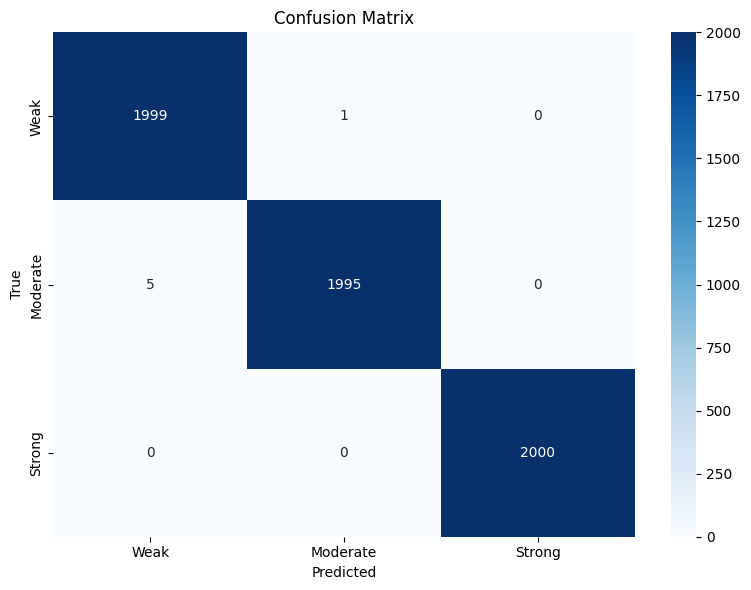

In [100]:
import torch
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to generate confusion matrix and classification report
def evaluate(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for features, labels in dataloader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    # Generate classification report
    report = classification_report(all_labels, all_preds, target_names=["Weak", "Moderate", "Strong"])

    return cm, report

# Function to plot confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Weak", "Moderate", "Strong"], yticklabels=["Weak", "Moderate", "Strong"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Main evaluation block
if __name__ == "__main__":
    dataset = PasswordDataset("balanced_password_dataset.csv")  # or .csv based on your actual file
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = PasswordNet(13).to(device)
    model.load_state_dict(torch.load("Password_strength_model.pth"))
    model.eval()

    cm, report = evaluate(model, dataloader, device)    
    print("Classification Report:\n")
    print(report)
    
    print("\nConfusion Matrix:\n")
    print(cm)
    
    plot_confusion_matrix(cm)


# Machine Learning Approach

In [72]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 1.3/150.0 MB 4.2 MB/s eta 0:00:36
    --------------------------------------- 2.1/150.0 MB 3.9 MB/s eta 0:00:38
    --------------------------------------- 2.9/150.0 MB 3.9 MB/s eta 0:00:38
    --------------------------------------- 3.4/150.0 MB 3.7 MB/s eta 0:00:40
   - -------------------------------------- 4.2/150.0 MB 3.6 MB/s eta 0:00:40
   - -------------------------------------- 4.7/150.0 MB 3.6 MB/s eta 0:00:41
   - -------------------------------------- 5.2/150.0 MB 3.5 MB/s eta 0:00:42
   - -------------------------------------- 6.0/150.0 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 6.6/150.0 MB 3.3 MB/s eta 0:00:44
   - -------------------------------------- 7.1/150.0 MB 3.3 MB/s eta 0:00:44
   -- ------------------------------------- 7.6/150.0 MB 3.2 MB/s eta 0

In [74]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from feature_extractor import extract_password_features
from sklearn.metrics import classification_report

In [9]:
data = pd.read_csv('balanced_password_dataset.csv')

In [10]:
data.columns

Index(['password', 'strength'], dtype='object')

In [16]:
def preprocessing(x):
    features = extract_password_features(x)
    vector = np.array(list(features.values()))
    return vector

In [27]:
vectorized_texts = data['password'].apply(preprocessing)

In [28]:
train_labels = data['strength']

In [58]:
trainx, testx, trainy, testy = train_test_split(vectorized_texts, train_labels, random_state=43, train_size=0.5)
trainx = np.vstack(trainx.values)
testx = np.vstack(testx.values)

In [68]:
rf_Classifier = RandomForestClassifier()
rf_Classifier.fit(trainx, trainy)

RandomForestClassifier()

In [69]:
predictions = rf_Classifier.predict(testx)

In [70]:
print(classification_report(predictions, testy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1026
           1       1.00      1.00      1.00       980
           2       1.00      1.00      1.00       994

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



C:\Users\jpsre\AppData\Local\Temp\ipykernel_20748\1480836771.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="viridis")


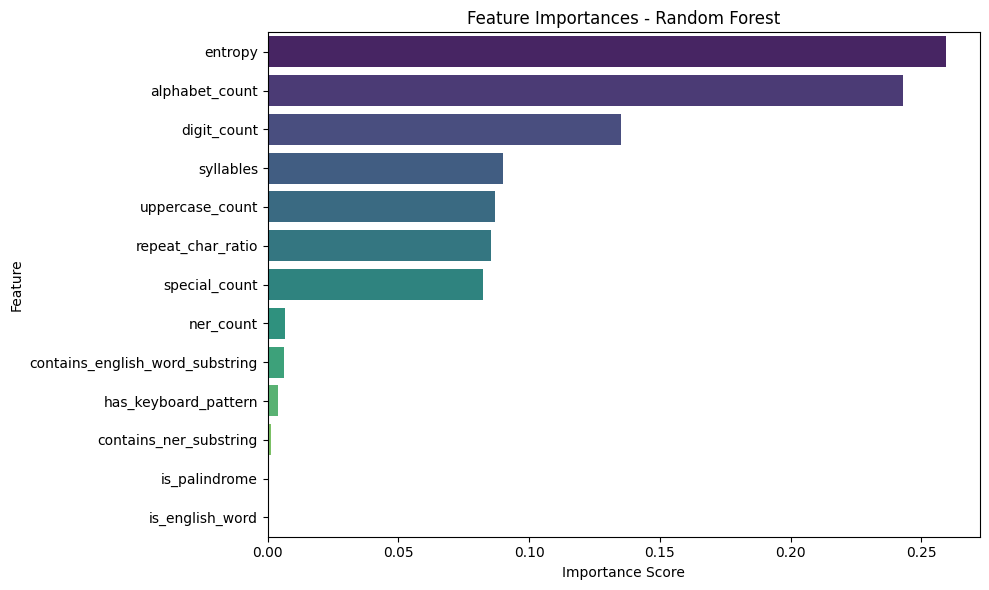

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of feature names
feature_names = [
    'alphabet_count', 'digit_count', 'special_count', 'uppercase_count',
    'entropy', 'syllables', 'is_english_word', 'is_palindrome',
    'repeat_char_ratio', 'ner_count', 'has_keyboard_pattern',
    'contains_ner_substring', 'contains_english_word_substring'
]

# Assuming `rf_model` is your trained RandomForestClassifier
importances = rf_Classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="viridis")
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()